In [1]:
#SVM
# performing linear algebra 
import numpy as np  
  
# data processing 
import pandas as pd 
  
# visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:

dataset = pd.read_csv("class A.csv") 
print (dataset.head) 

<bound method NDFrame.head of       satisfaction_level  left  last_evaluation  number_project  \
0                   0.96     0             0.97               6   
1                   0.96     0             0.97               6   
2                   0.97     0             0.92               6   
3                   0.97     0             0.92               6   
4                   0.96     0             0.93               6   
...                  ...   ...              ...             ...   
2995                0.73     0             0.74               4   
2996                0.74     0             0.75               4   
2997                0.99     0             0.84               5   
2998                0.86     0             0.90               4   
2999                0.17     0             0.91               6   

      average_montly_hours  time_spend_company  Work_accident  \
0                      137                  10              0   
1                      137         

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
satisfaction_level       3000 non-null float64
left                     3000 non-null int64
last_evaluation          3000 non-null float64
number_project           3000 non-null int64
average_montly_hours     3000 non-null int64
time_spend_company       3000 non-null int64
Work_accident            3000 non-null int64
promotion_last_5years    3000 non-null int64
Department               3000 non-null object
salary                   3000 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 234.5+ KB


In [4]:
dataset.describe()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0
mean,0.780793,0.309333,0.847637,4.629000,220.377000,4.747667,0.139667,0.0
std,0.152528,0.462296,0.122545,0.718933,41.898043,1.840957,0.346699,0.0
min,0.120000,0.000000,0.360000,3.000000,96.000000,2.000000,0.000000,0.0
25%,0.720000,0.000000,0.780000,4.000000,192.000000,3.000000,0.000000,0.0
50%,0.810000,0.000000,0.870000,5.000000,232.000000,5.000000,0.000000,0.0
75%,0.890000,1.000000,0.940000,5.000000,254.000000,5.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,7.000000,307.000000,10.000000,1.000000,0.0


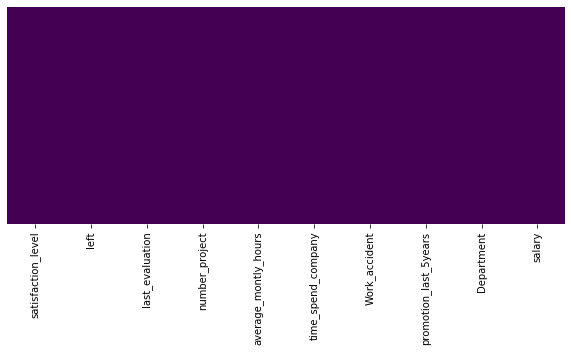

In [5]:
# heatmap to check the missing value 
plt.figure(figsize =(10, 4)) 
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

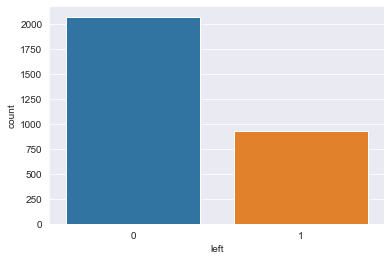

In [6]:
sns.set_style('darkgrid') 
sns.countplot(x ='left', data = dataset) 

In [7]:
len(object_col)

NameError: name 'object_col' is not defined

In [8]:

y = dataset.iloc[:, 1] 
x = dataset 
x.drop('left', axis = 1, inplace = True)

In [9]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder() 
y = lb.fit_transform(y) 

In [10]:
 
dum_Department = pd.get_dummies(dataset['Department'],  
                                prefix ='Department') 
dum_salary = pd.get_dummies(dataset['salary'],  
                                prefix ='salary') 

# Adding these dummy variable to input X 
X = pd.concat([x, dum_Department,  
               dum_salary], axis = 1) 
# Removing the categorical data 
X.drop(['Department', 'salary'],  
        axis = 1, inplace = True) 
  
print(X.shape) 
print(y.shape) 

(3000, 20)
(3000,)


In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.25, random_state = 40)

In [12]:
from sklearn.svm import SVC

In [13]:
model=SVC()

In [14]:
model.fit(X_train,y_train) 

C:\Users\Aynur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
predictions=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,matthews_corrcoef

In [16]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(matthews_corrcoef(y_test,predictions))

[[458  61]
 [ 23 208]]


              precision    recall  f1-score   support

           0       0.95      0.88      0.92       519
           1       0.77      0.90      0.83       231

    accuracy                           0.89       750
   macro avg       0.86      0.89      0.87       750
weighted avg       0.90      0.89      0.89       750



0.753610307419248


In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [19]:
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [20]:
grid.fit(X_train,y_train)

C:\Users\Aynur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.690, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.691, total=   0.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.690, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.852, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.836, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.849, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.684, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.728, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.705, total=   0.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ..................... C=1000, gamma=1, score=0.891, total=   0.3s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.891, total=   0.3s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.896, total=   0.3s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.931, total=   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.924, total=   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.933, total=   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.933, total=   0.3s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   15.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [21]:
grid.best_params_

{'C': 1000, 'gamma': 0.01}

In [22]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
grid_predictions=grid.predict(X_test)

In [24]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))
print('\n')
print("MCC               ",matthews_corrcoef(y_test,grid_predictions))

[[486  33]
 [ 14 217]]


              precision    recall  f1-score   support

           0       0.97      0.94      0.95       519
           1       0.87      0.94      0.90       231

    accuracy                           0.94       750
   macro avg       0.92      0.94      0.93       750
weighted avg       0.94      0.94      0.94       750



MCC                0.8577181964180495
